# Bias-Variance Tradeoff

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import numpy as np
from numpy.random import randint, choice, normal, shuffle
import pandas as pd

from scipy.special import factorial

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')

## Generate Sample Data

In [4]:
def f(x, max_degree=9):
    taylor = [(-1)**i * x ** e / factorial(e) for i, e in enumerate(range(1, max_degree, 2))] # []
    return  np.sum(taylor, axis=0)

5.0


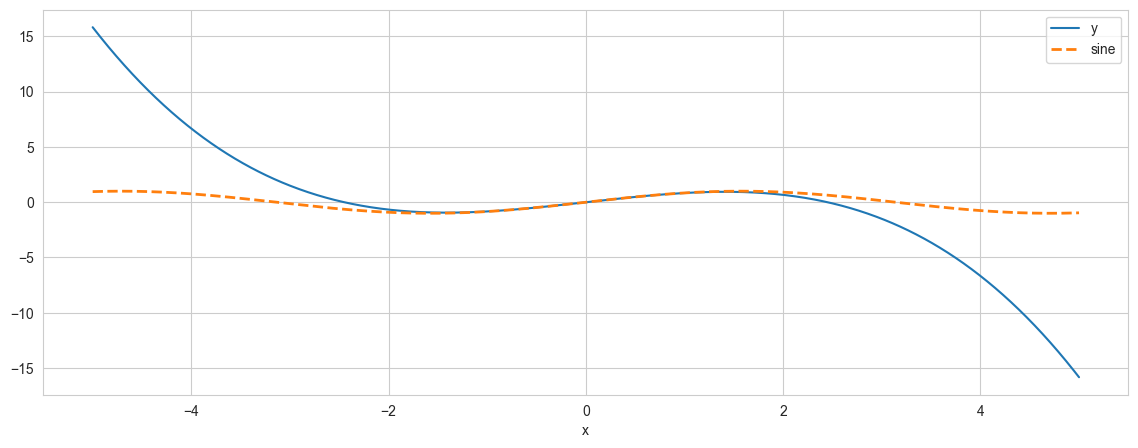

In [8]:
max_degree = 5
fig, ax = plt.subplots(figsize=(14, 5))
x = np.linspace(-5, 5, 1000)
print(np.max(x))
data = pd.DataFrame({'y': f(x, max_degree), 'x': x})
data.plot(x='x', y='y', legend=False, ax=ax)
pd.Series(np.sin(x), index=x).plot(ax=ax, ls='--', lw=2, label='sine')
plt.legend();

## Underfitting vs overfitting: a visual example

In [6]:
from collections import defaultdict

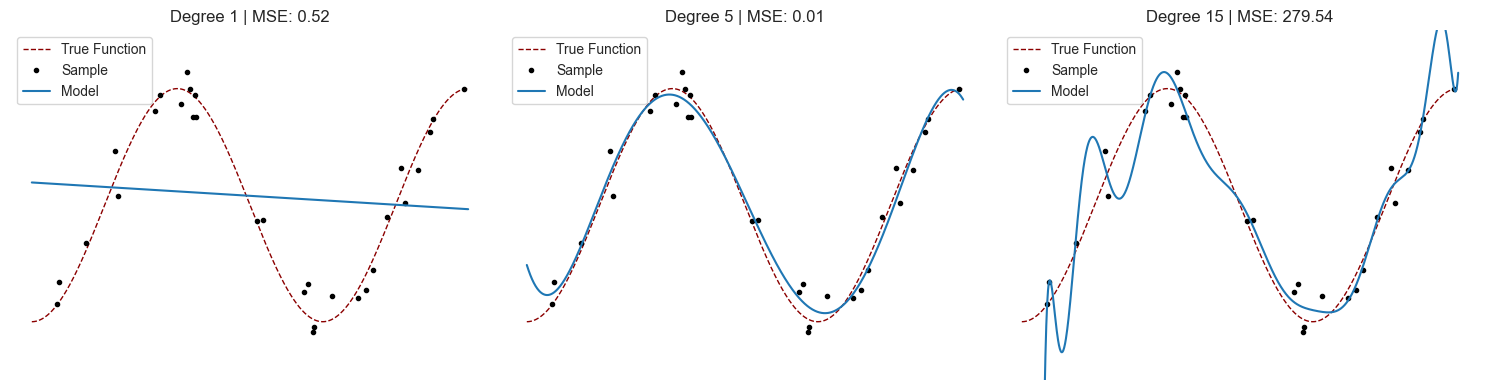

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
x = np.linspace(-.5 * np.pi, 2.5 * np.pi, 1000)
true_function = pd.Series(np.sin(x), index=x)
n = 30
noise = .2
degrees = [1, 5, 15]
x_ = np.random.choice(x, size=n) # choose 30 random points from x
y_ = np.sin(x_) # get corresponding y values for sine function
y_ +=  normal(loc=0, scale=np.std(y_) * noise, size=n) # add noise 
mse = defaultdict(list)
for i, degree in enumerate(degrees):
    fit = np.poly1d(np.polyfit(x=x_, y=y_, deg=degree))
    true_function.plot(ax=axes[i], c='darkred', lw=1, ls='--', label='True Function')
    pd.Series(y_, index=x_).plot(style='.', label='Sample', ax=axes[i], c='k')
    pd.Series(fit(x), index=x).plot(label='Model', ax=axes[i])
    axes[i].set_ylim(-1.5, 1.5)
    mse = mean_squared_error(fit(x), np.sin(x))
    axes[i].set_title(f'Degree {degree} | MSE: {mse:,.2f}')
    axes[i].legend()
    axes[i].grid(False)
    axes[i].axis(False)

sns.despine()
fig.tight_layout();

## Bias-Variance Tradeoff

### Train Model

In [12]:
datasets = ['Train', 'Test']
X = {'Train': np.linspace(-1, 1, 1000), 'Test': np.linspace(1, 2, 500)}

models = {'Underfit': 1, 'Right Fit': 5, 'Overfit': 9}

sample, noise = 25, .01
result = []
for i in range(100): # train 100 different times
    x_ = {d: choice(X[d], size=sample, replace=False) for d in datasets} # choose 25 random points from Train and Test
    y_ = {d: f(x_[d], max_degree=5) for d in datasets}
    y_['Train'] += normal(loc=0,
                          scale=np.std(y_['Train']) * noise,
                          size=sample)

    trained_models = {
        fit: np.poly1d(np.polyfit(x=x_['Train'], y=y_['Train'], deg=deg))
        for fit, deg in models.items()
    } # train for each model, just different degrees

    for fit, model in trained_models.items():
        for dataset in datasets:
            print(dataset, fit)
            pred = model(x_[dataset])
            result.append(
                pd.DataFrame(
                    dict(x=x_[dataset],
                         Model=fit,
                         Data=dataset,
                         y=pred,
                         Error=pred - y_[dataset]))) # collect training and testing results 
result = pd.concat(result)

Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fit
Test Right Fit
Train Overfit
Test Overfit
Train Underfit
Test Underfit
Train Right Fi

In [13]:
result

,x,Model,Data,y,Error
0,0.301301,Underfit,Train,0.269190,-0.030464
1,-0.579580,Underfit,Train,-0.528152,0.023902
2,0.553554,Underfit,Train,0.497520,-0.030950
3,0.325325,Underfit,Train,0.290936,-0.028072
4,0.963964,Underfit,Train,0.869008,0.053715
...,...,...,...,...,...
20,1.589178,Overfit,Test,-50.831218,-51.751488
21,1.503006,Overfit,Test,-26.839358,-27.776475
22,1.991984,Overfit,Test,-551.815710,-552.490328
23,1.368737,Overfit,Test,-8.315807,-9.257169


### Plot result

In [17]:
y = {d: f(X[d], max_degree=5) for d in datasets}
y['Train_noise'] = y['Train'] + normal(loc=0,
                                       scale=np.std(y['Train']) * noise,
                                       size=len(y['Train']))
colors = {'Underfit': 'darkblue', 'Right Fit': 'darkgreen', 'Overfit': 'darkred'}
test_data = result[result.Data == 'Test']

In [22]:
result

,x,Model,Data,y,Error
0,0.301301,Underfit,Train,0.269190,-0.030464
1,-0.579580,Underfit,Train,-0.528152,0.023902
2,0.553554,Underfit,Train,0.497520,-0.030950
3,0.325325,Underfit,Train,0.290936,-0.028072
4,0.963964,Underfit,Train,0.869008,0.053715
...,...,...,...,...,...
20,1.589178,Overfit,Test,-50.831218,-51.751488
21,1.503006,Overfit,Test,-26.839358,-27.776475
22,1.991984,Overfit,Test,-551.815710,-552.490328
23,1.368737,Overfit,Test,-8.315807,-9.257169


Underfit
Right Fit
Overfit


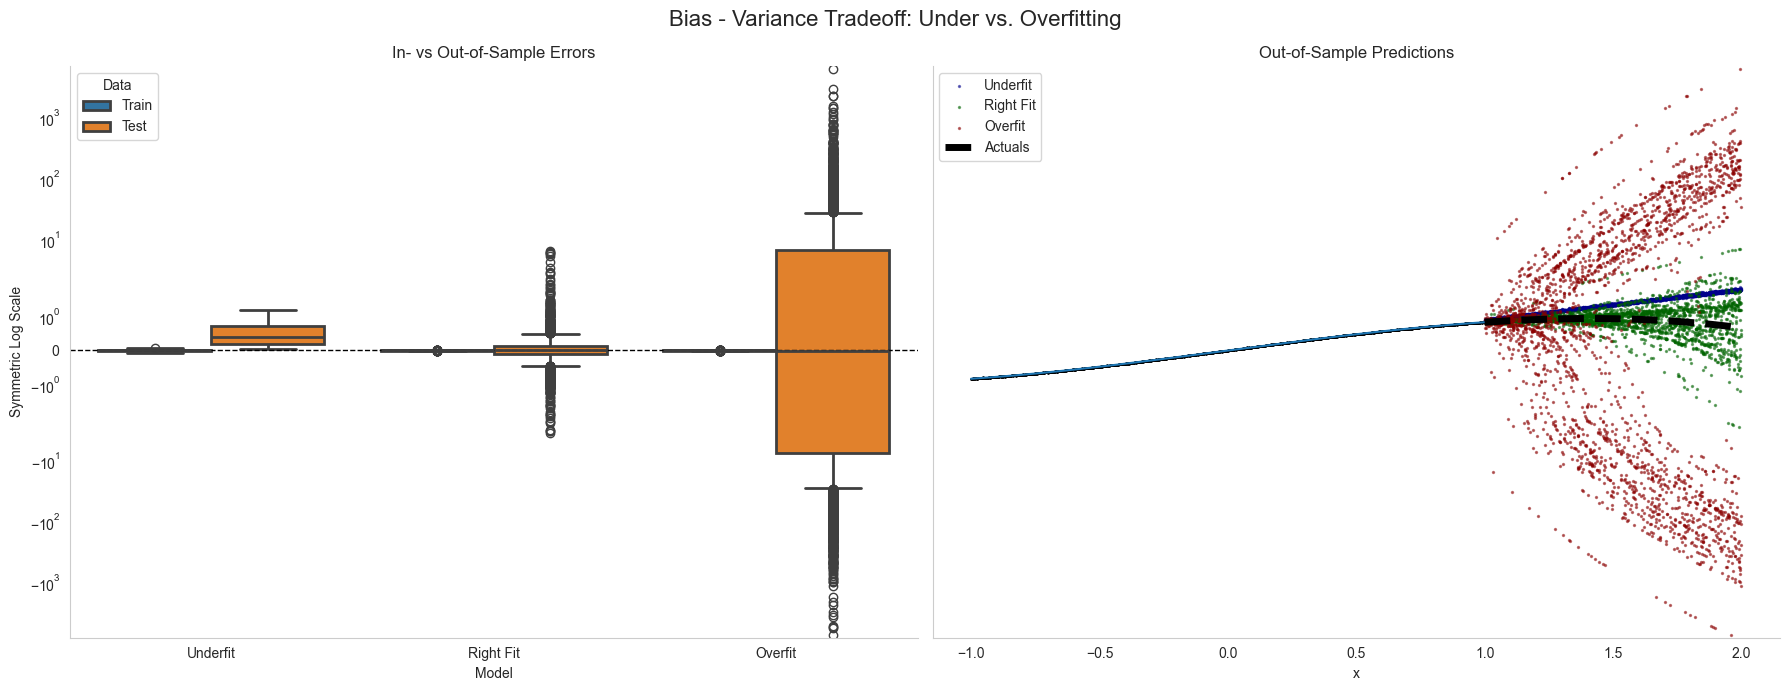

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 7), sharey=True)

sns.boxplot(x='Model', y='Error', hue='Data', data=result, ax=axes[0], linewidth=2) # PLOT ERROR DISTRIBUTION WHRE X IS MODEL TYPE, Y IS ERROR, HUE IS TRAIN/TEST
axes[0].set_title('In- vs Out-of-Sample Errors')
axes[0].axhline(0, ls='--', lw=1, color='k')
axes[0].set_ylabel('Symmetric Log Scale')

for model in colors.keys():
    print(model)
    (test_data[(test_data['Model'] == model)] # get test data result for each model
     .plot.scatter(x='x',
                   y='y',
                   ax=axes[1], # on the second axis, which will be the graph on the right, so its out of sample
                   s=2, # size of points
                   color=colors[model],
                   alpha=.5,# transparency
                   label=model))

pd.Series(y['Train'], index=X['Train']).sort_index().plot(ax=axes[1], title='Out-of-sample Predictions')
pd.DataFrame(dict(x=X['Train'], y=y['Train_noise'])).plot.scatter(x='x', y='y', ax=axes[1], c='k', s=1)
pd.Series(y['Test'], index=X['Test']).plot(color='black', lw=5, ls='--', ax=axes[1], label='Actuals')

axes[0].set_yscale('symlog')
axes[1].set_title('Out-of-Sample Predictions')
axes[1].legend()
axes[0].grid(False)
axes[1].grid(False)
sns.despine()
fig.tight_layout()
fig.suptitle('Bias - Variance Tradeoff: Under vs. Overfitting', fontsize=16)
fig.subplots_adjust(top=0.9)

## Learning Curves

In [11]:
def folds(train, test, nfolds):
    shuffle(train)
    shuffle(test)
    
    steps = (np.array([len(train), len(test)]) / nfolds).astype(int)
    for fold in range(nfolds):
        i, j = fold * steps
        yield train[i:i + steps[0]], test[j: j+steps[1]]

In [12]:
def rmse(y, x, model):
    return np.sqrt(mean_squared_error(y_true=y, y_pred=model.predict(x)))

In [13]:
def create_poly_data(data, degree):
    return np.hstack((data.reshape(-1, 1) ** i) for i in range(degree + 1))

In [14]:
train_set = X['Train'] + normal(scale=np.std(f(X['Train']))) * .2
test_set =  X['Test'].copy()  

sample_sizes = np.arange(.1, 1.0, .01)
indices = ([len(train_set), len(test_set)] *
           sample_sizes.reshape(-1, 1)).astype(int)
result = []
lr = LinearRegression()
for label, degree in models.items():
    model_train = create_poly_data(train_set, degree)
    model_test = create_poly_data(test_set, degree)
    for train_idx, test_idx in indices:
        train = model_train[:train_idx]
        test = model_test[:test_idx]
        train_rmse, test_rmse = [], []
        for x_train, x_test in folds(train, test, 5):
            y_train, y_test = f(x_train[:, 1]), f(x_test[:, 1])
            lr.fit(X=x_train, y=y_train)
            train_rmse.append(rmse(y=y_train, x=x_train, model=lr))
            test_rmse.append(rmse(y=y_test, x=x_test, model=lr))
        result.append([label, train_idx,
                       np.mean(train_rmse), np.std(train_rmse),
                       np.mean(test_rmse), np.std(test_rmse)])

result = (pd.DataFrame(result,
                       columns=['Model', 'Train Size',
                                'Train RMSE', 'Train RMSE STD',
                                'Test RMSE', 'Test RMSE STD'])
          .set_index(['Model', 'Train Size']))

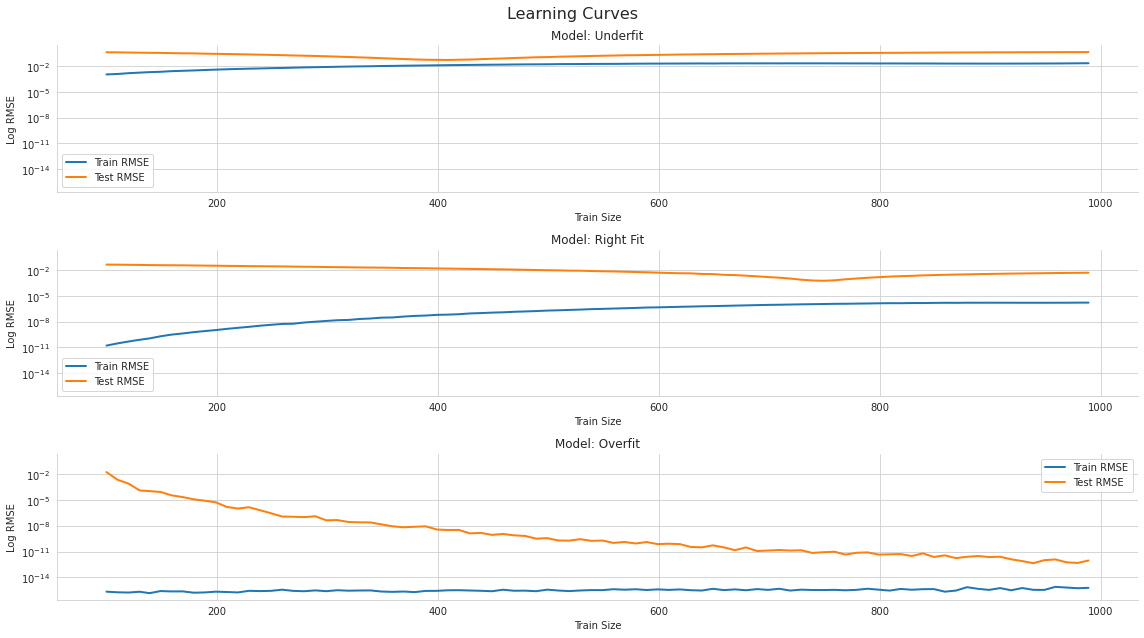

In [15]:
fig, axes = plt.subplots(nrows=3, sharey=True, figsize=(16, 9))
for i, model in enumerate(models.keys()):
    result.loc[model, ['Train RMSE', 'Test RMSE']].plot(ax=axes[i], title=f'Model: {model}', logy=True, lw=2)
    axes[i].set_ylabel('Log RMSE')

fig.suptitle('Learning Curves', fontsize=16)
fig.tight_layout()
sns.despine()
fig.subplots_adjust(top=.92);